In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

#BiocManager::install("treeio")
#BiocManager::install("ggtree")
#BiocManager::install("Biostrings")
#BiocManager::install("XVector")

#install.packages("tidyverse")
#install.packages("ggplot2")
#install.packages("ggstance")
#install.packages("ggmsa")
#install.packages("seqmagick")
#install.packages("shiny")
#install.packages("seqinr")

also installing the dependencies ‘pixmap’, ‘sp’, ‘ade4’, ‘segmented’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(treeio)
library(ggtree)
library(tidyverse)
library(ggplot2)
library(ggstance)
library(Biostrings)
library(ggmsa)
library(seqmagick)
library(XVector)
library(gtable)
library(grid)
library(shiny)
library(seqinr)

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

treeio v1.13.1  For help: https://yulab-smu.github.io/treedata-book/

If you use treeio in published research, please cite:

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR Jones, T Bradley, H Zhu, Y Guan, Y Jiang, G Yu. treeio: an R package for phylogenetic tree input and output with richly annotated and associated data. Molecular Biology and Evolution 2020, 37(2):599-603. doi: 10.1093/molbev/msz240


ggtree v2.3.7  For help: https://yulab-smu.github.io/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics, 2020, 69:e96. doi:10.1002/cpbi.96
- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution 2018, 35(12):3041-3

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   1                   2 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  3                   2                   3                   1 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  1                   1                   1                   2 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                  2                   2                   3                   3 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                  3                   1                   1                   1 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                  1                   2                   2                   3 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                  3                   1                   1                   1 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                  3                   1                   4                   1

$`1`
 [1] "Mazda RX4"      "Mazda RX4 Wag"  "Datsun 710"     "Merc 240D"     
 [5] "Merc 230"       "Merc 280"       "Merc 280C"      "Fiat 128"      
 [9] "Honda Civic"    "Toyota Corolla" "Toyota Corona"  "Fiat X1-9"     
[13] "Porsche 914-2"  "Lotus Europa"   "Ferrari Dino"   "Volvo 142E"    

$`2`
[1] "Hornet 4 Drive"   "Valiant"          "Merc 450SE"       "Merc 450SL"      
[5] "Merc 450SLC"      "Dodge Challenger" "AMC Javelin"     

$`3`
[1] "Hornet Sportabout"   "Duster 360"          "Cadillac Fleetwood" 
[4] "Lincoln Continental" "Chrysler Imperial"   "Camaro Z28"         
[7] "Pontiac Firebird"    "Ford Pantera L"     

$`4`
[1] "Maserati Bora"

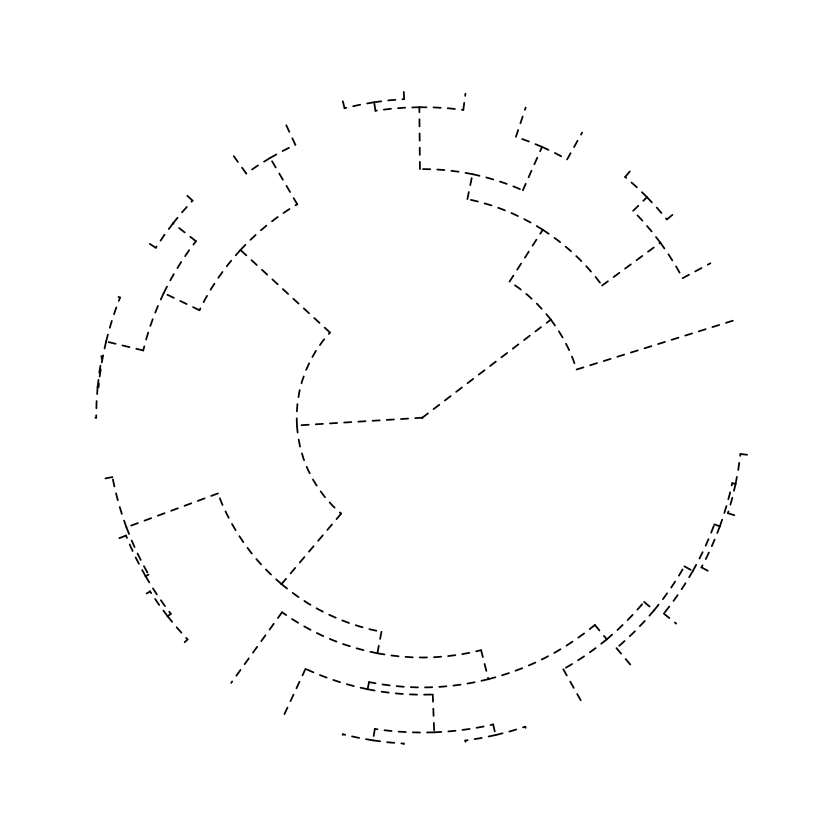

In [89]:
### color playing - idea is splitting the tree elements into several groups - this way I can get around the node horror

hc <- hclust(dist(mtcars))
den <- as.dendrogram(hc)

clus <- cutree(hc, 4)
clus

g <- split(names(clus), clus)
g

p <- ggtree(hc, linetype='dashed')
p



In [82]:
clades <- sapply(g, function(n) MRCA(p, n))


In [83]:
p <- groupClade(p, clades, group_name='subtree') + aes(color=subtree)


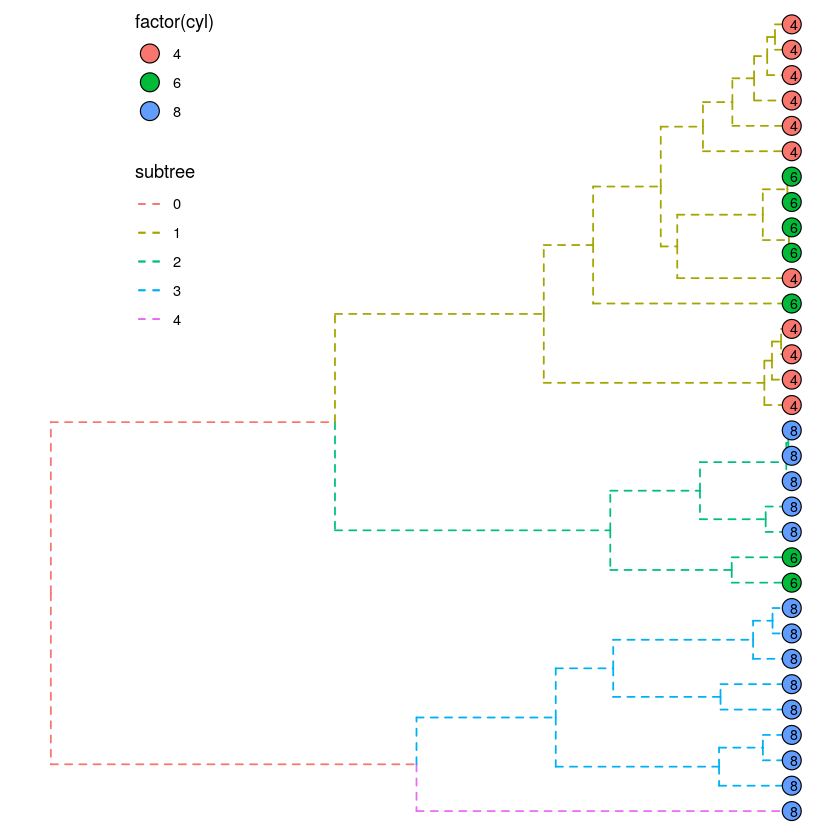

In [84]:
d <- data.frame(label = names(clus), 
                cyl = mtcars[names(clus), "cyl"])
#d

p %<+% d +
#  layout_dendrogram() + 
  geom_tippoint(size=5, shape=21, aes(fill=factor(cyl), x=x+.5), color='black') +
  geom_tiplab(aes(label=cyl), size=3, hjust=.5, color='black') +
#  geom_highlight(node=clades, alpha=.2) +
#  geom_tiplab(hjust=-1, offset=-10, show.legend=F) +
#  geom_tiplab(angle=90, hjust=1, offset=-20, show.legend=F) + 
#  scale_color_brewer(palette='Set1', breaks=1:4) +
#  theme_dendrogram(plot.margin=margin(6,6,80,6)) +
  theme(legend.position=c(.2, .8))



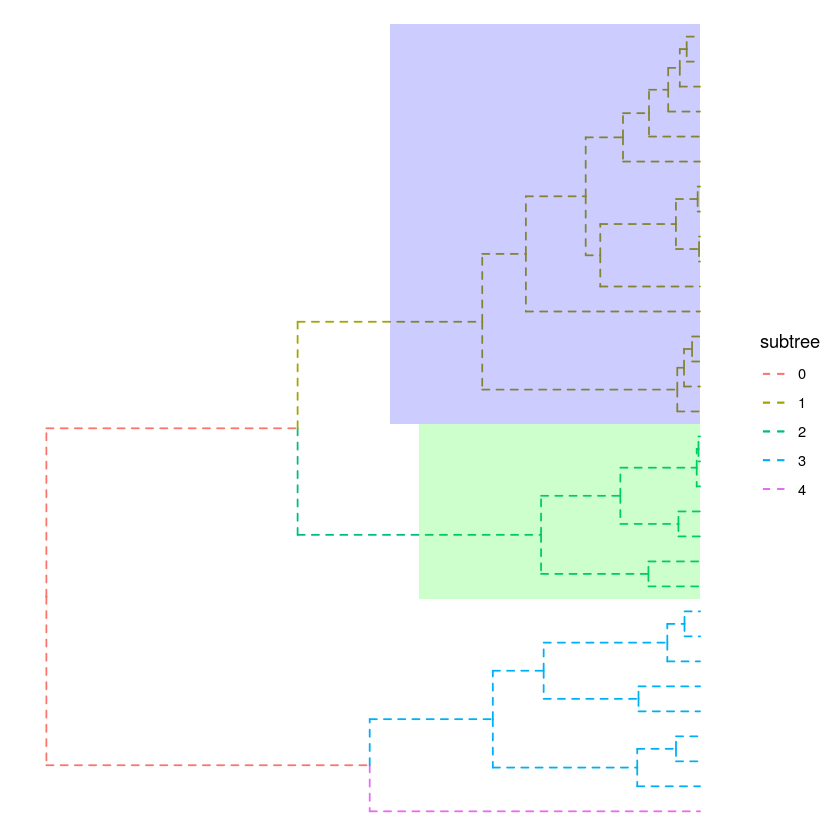

In [88]:
p <- p + geom_highlight(node=clades[1], fill = "blue", alpha=.2)
p + geom_highlight(node=clades[2], fill = "green", alpha=.2)


In [69]:
clades

1  2  3  4 
37 36 38 31

## Circular fun

[1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

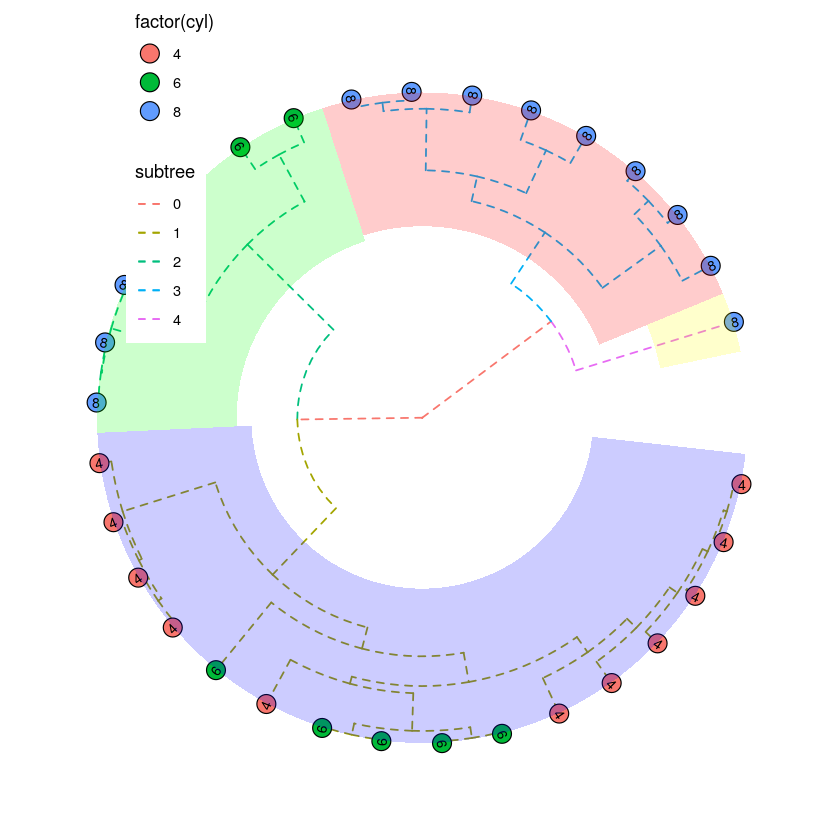

In [328]:
hc <- hclust(dist(mtcars))
den <- as.dendrogram(hc)
clus <- cutree(hc, 4)
g <- split(names(clus), clus)

p <- ggtree(hc, linetype='dashed', layout = "circular")
#p

clades <- sapply(g, function(n) MRCA(p, n))
p <- groupClade(p, clades, group_name='subtree') + aes(color=subtree)

d <- data.frame(label = names(clus), 
                cyl = mtcars[names(clus), "cyl"])
names(clus)
                 
p %<+% d +
#  layout_dendrogram() + 
  geom_tippoint(size=5, shape=21, aes(fill=factor(cyl), x=x+.5), color='black') +
  geom_tiplab(aes(label=cyl), size=3, hjust=.5, color='black') +
  geom_hilight(node=clades[1], fill = "blue", alpha=.2) +
  geom_hilight(node=clades[2], fill = "green", alpha=.2) +
  geom_hilight(node=clades[3], fill = "red", alpha=.2) +
  geom_hilight(node=clades[4], fill = "yellow", alpha=.2) +
#  geom_tiplab(hjust=-1, offset=-10, show.legend=F) +
#  geom_tiplab(angle=90, hjust=1, offset=-20, show.legend=F) + 
#  scale_color_brewer(palette='Set1', breaks=1:4) +
#  theme_dendrogram(plot.margin=margin(6,6,80,6)) +
  theme(legend.position=c(.2, .8))

N0.HOG0013296 N0.HOG0017021     singleton N0.HOG0013194 N0.HOG0019467 
           17            19            17            22            29 
N0.HOG0019243 
           30

[1] singleton     singleton     singleton     singleton     singleton    
 [6] N0.HOG0013194 N0.HOG0013194 N0.HOG0013194 singleton     singleton    
[11] singleton     singleton     N0.HOG0019467 N0.HOG0019467 N0.HOG0019243
[16] N0.HOG0019243 singleton     singleton     singleton     singleton    
[21] singleton     N0.HOG0013194 N0.HOG0013194 singleton     singleton    
[26] singleton     singleton     singleton     N0.HOG0019467 N0.HOG0019243
Levels: N0.HOG0013194 N0.HOG0019243 N0.HOG0019467 singleton

label
<chr>
N0.HOG0013296
N0.HOG0017021
N0.HOG0017021
singleton
singleton
N0.HOG0013194
N0.HOG0013194
N0.HOG0013194
N0.HOG0013296


$N0.HOG0013296
[1] "AT3G49680"        "HORVU1Hr1G053320" "Zm00001d029848"  

$N0.HOG0017021
[1] "HORVU0Hr1G008950" "Zm00001d028303"  

$singleton
[1] "AT1G10070"      "AT1G10060"      "Zm00001d045803" "Zm00001d048539"

$N0.HOG0013194
[1] "AT3G19710" "AT1G50110" "AT1G50090"

$N0.HOG0019467
[1] "HORVU1Hr1G002790" "HORVU4Hr1G087100"

$N0.HOG0019243
[1] "Zm00001d002694"   "HORVU2Hr1G096380"

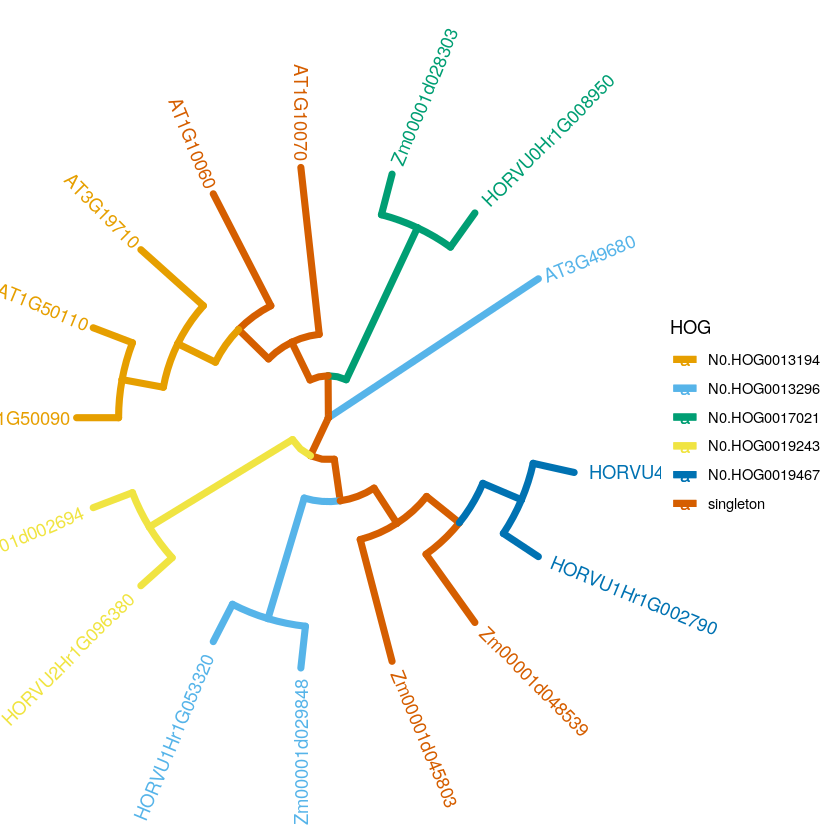

In [667]:
# rlang package has the function is_empty()
# with it we can test for "character(0)"

el <- list()

for (i in 1:length(tree$tip.label)) {
    if (is_empty(meta1$HOG[meta1$genes == tree$tip.label[i]]) == FALSE) {
       first <- meta1$HOG[meta1$genes == tree$tip.label[i]]
       el <- c(el, list(filler = tree$tip.label[i]))
       names(el)[i] <- first
    }
    else {
       el <- c(el, list(singleton = tree$tip.label[i]))      
    }
    
}

#reduce the list to unique tags
el_split <- sapply(unique(names(el)), function(x) unname(unlist(el[names(el)==x])), simplify=FALSE)


tree <- read.tree("~/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.tree")
p <- ggtree(tree, layout = "circular", size=2, branch.length = "none")
#p without singletons?
#p <- ggtree(short_tree, layout = "circular", size=2, branch.length = "none")

                   
clades <- sapply(el_split, function(n) MRCA(p, n))
#clades <- clades[c(-1,-2,-4,-5)]
clades

p <- groupClade(p, clades, group_name='subtree') + aes(color=subtree)

d <- data.frame(label = names(el))
#                log = meta1[names(tree$tip.label), "logFC"])
 
p$data$subtree
d

                 
#most basal? one will always include the singletons as well
#have to test this... could also be that order of list has an impact
#on the other hand inferring clade like this is also cool, just have to mention that singletons are in there
#or I just offer to to use/not use the singletons - just need two two tables to pull from?

#p %<+% d +
#  geom_tiplab(hjust=-0.1, offset=-0.11, show.legend=F) +
##  geom_hilight(node=clades[1], fill = "blue", alpha=.2) 
##  geom_hilight(node=clades[2], fill = "green", alpha=.2)
#  geom_hilight(node=clades[3], fill = "red", alpha=.2)
##  geom_hilight(node=clades[4], fill = "yellow", alpha=.2) +
##  geom_hilight(node=clades[5], fill = "pink", alpha=.2)
                 
#meta1$HOG[meta1$genes == tree$tip.label]
#meta1$HOG
                 
                 
#groupOTU
el_split
                 
p_OTU <- ggtree(tree, layout = 'circular', branch.length='none', size=2)


cols <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

                 
pg <- groupOTU(p_OTU, el_split, 'HOG') + aes(color=HOG) +
    geom_tiplab(hjust=-0.1, offset=-0.11) +
#    geom_hilight2(aes("singleton")) +
#    ggtree::geom_hilight(data=p_OTU, node=p_OTU$data$node[1]) +
    theme(legend.position="right") +
    scale_color_manual(values=cols, na.translate=TRUE, na.value = "black")
               
#pg <- pg + ggtree::geom_hilight(data=p_OTU, node=1, fill='HOG')

pg


In [646]:
?ggtree

In [420]:
#tree$tip.label
#?vector
#str(el_set)
#el_set

#names(el)

#data.frame(label = names(el))
#                log = meta1[names(tree$tip.label), "logFC"])

#el_split[-3]
#p$data$subtree[p$data$label=="Zm00001d048539",] [<- "singleton"
#almost
#mutate(p$data, subtree = fct_recode(subtree, "singleton" = "N0.HOG0013296"))
#mutate(p$data, subtree[1] = fct_recode(subtree[1], "singleton" = "N0.HOG0013296"))
#p$data
library(forcats)
#p$data$subtree[1]
#fct_recode(p$data$subtree, 
#           two = as.character(p$data$subtree[2]),
#           three = as.character(p$data$subtree[3]))
#as.factor(el_split$singleton)
#str(p$data)
#add factor?
#el_split$singleton
#?drop.tip
#short_tree <- drop.tip(tree, el_split$singleton)
p$data

parent,node,branch.length,label,isTip,x,y,branch,angle,subtree
<int>,<int>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
13,1,0.29943794,AT3G49680,TRUE,4,1.000000,2.0,30.00,N0.HOG0013296
15,2,0.15453990,HORVU0Hr1G008950,TRUE,4,2.000000,3.5,60.00,N0.HOG0017021
15,3,0.21230286,Zm00001d028303,TRUE,4,3.000000,3.5,90.00,N0.HOG0017021
16,4,0.52133652,AT3G19710,TRUE,4,4.000000,3.0,120.00,N0.HOG0013194
17,5,0.12974576,AT1G50110,TRUE,4,5.000000,3.5,150.00,N0.HOG0013194
17,6,0.11125794,AT1G50090,TRUE,4,6.000000,3.5,180.00,N0.HOG0013194
20,7,0.10497476,HORVU1Hr1G053320,TRUE,4,9.000000,3.5,270.00,N0.HOG0013296
20,8,0.08486502,Zm00001d029848,TRUE,4,10.000000,3.5,300.00,N0.HOG0013296
21,9,0.19020588,HORVU1Hr1G002790,TRUE,4,11.000000,3.5,330.00,N0.HOG0019467


In [599]:
?ggtree

## Current CircGraphic


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  genes = col_character(),
  HOG = col_character(),
  logFC = col_double()
)




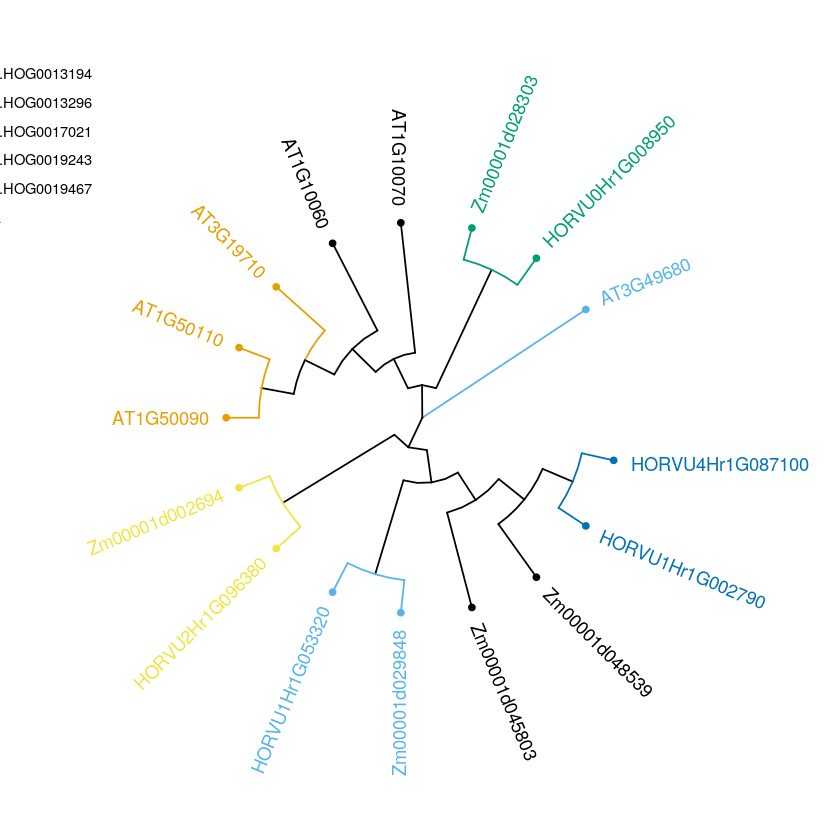

In [506]:
tree <- read.tree("~/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.tree")
meta1 <- read_table2("~/Desktop/PhD/A2TEA/shiny/example_trees/custom_metafile.txt")
#extracted from colourblind - removed black... how to deal with NAs..
cols <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")


ggtree(tree, layout='circular', branch.length="none", aes(color=HOG)) %<+% meta1 +
  ggplot2::xlim(0, 10) +
  geom_tippoint(aes(color=HOG)) +
  scale_color_manual(values=cols, na.translate=TRUE, na.value = "black") +
  geom_tiplab2(aes(color=HOG), align=F, offset=0.5, alpha=1) +
  theme(legend.position=c(.005, .85))


## Current Sideways Rectangular Panels


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  genes = col_character(),
  HOG = col_character(),
  logFC = col_double()
)




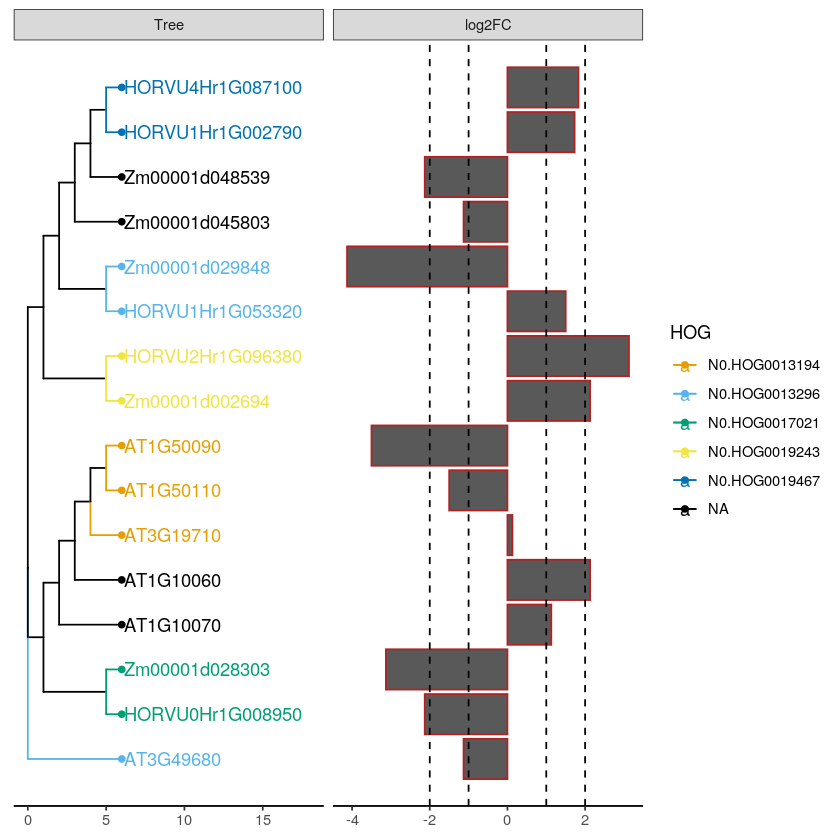

In [547]:
tree <- read.tree("~/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.tree")
meta1 <- read_table2("~/Desktop/PhD/A2TEA/shiny/example_trees/custom_metafile.txt")
#extracted from colourblind - removed black... how to deal with NAs..
cols <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

#library(ggstance)

p <- ggtree(tree, layout='rectangular', branch.length="none", aes(color=HOG)) %<+% meta1 +
  geom_tippoint(aes(color=HOG)) +
  scale_color_manual(values=cols, na.translate=TRUE, na.value = "black") +
  geom_tiplab(aes(color=HOG), align=F, offset = 0.1, alpha=1)
#  theme(legend.position=c(.08, .85))


#?geom_barh

#d <- data.frame(id = rep(tree$tip.label, each=2),
#                    value = abs(rnorm(16, mean=100, sd=50)),
#                    category = rep(LETTERS[1:2], 16))

d <- data.frame(id = rep(tree$tip.label),
                    value = abs(rnorm(16)))

d$value[1] <- -1.12942
d$value[2] <- -2.12942
d$value[3] <- -3.12942
d$value[4] <- 1.12942
d$value[5] <- 2.12942
d$value[6] <- 0.12942
d$value[7] <- -1.5
d$value[8] <- -3.5
d$value[9] <- 1.5
d$value[10] <- -4.12942
d$value[11] <- -1.12942
d$value[12] <- -2.12942
d$value[13] <- 1.72942
d$value[14] <- 1.82942
d$value[15] <- 2.12942
d$value[16] <- 3.12942


lines=data.frame(y = c(-2,-1,1,2), .panel='log2FC')

facet_plot(p + xlim_tree(18), panel = 'log2FC', data = d, 
                geom = geom_barh, 
                mapping = aes(x = value),
                stat='identity',
#                inherit.aes = TRUE,
                color='firebrick') + theme_tree2() + geom_vline(data=lines, aes(xintercept=y), linetype = "dashed")


#+ geom_vline(xintercept = c(-2,-1, 1, 2), linetype = "dashed")


#p2 <- facet_plot(p, panel = 'log2FC', 
#                 data = d, geom = geom_barh,
#                 mapping = aes(x = logFC, fill = as.factor(category)))

#facet_plot(p, panel = 'log2FC', data = d, 
#                geom = geom_barh, 
#                mapping = aes(x = value, fill = as.factor(category)), 
#                stat='identity' ) 


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  genes = col_character(),
  HOG = col_character(),
  logFC = col_double()
)




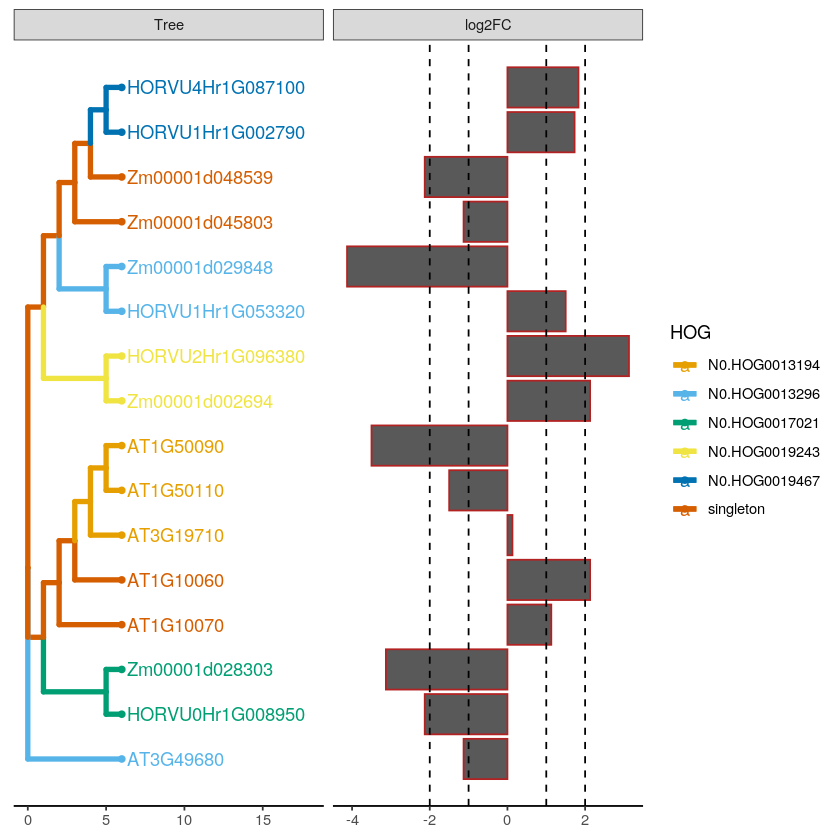

In [671]:
tree <- read.tree("~/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.tree")
meta1 <- read_table2("~/Desktop/PhD/A2TEA/shiny/example_trees/custom_metafile.txt")
#extracted from colourblind - removed black... how to deal with NAs..
cols <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")


# rlang package has the function is_empty()
# with it we can test for "character(0)"

el <- list()

for (i in 1:length(tree$tip.label)) {
    if (is_empty(meta1$HOG[meta1$genes == tree$tip.label[i]]) == FALSE) {
       first <- meta1$HOG[meta1$genes == tree$tip.label[i]]
       el <- c(el, list(filler = tree$tip.label[i]))
       names(el)[i] <- first
    }
    else {
       el <- c(el, list(singleton = tree$tip.label[i]))      
    }
}

#reduce the list to unique tags
el_split <- sapply(unique(names(el)), function(x) unname(unlist(el[names(el)==x])), simplify=FALSE)

p_OTU <- ggtree(tree, layout = 'rectangular', branch.length='none', size=1.5)

p <- groupOTU(p_OTU, el_split, 'HOG') + aes(color=HOG) +
                   geom_tippoint(aes(color=HOG)) +
            scale_color_manual(values=cols, na.translate=TRUE, na.value = "black") +
            geom_tiplab(aes(color=HOG), align=F, offset = 0.3, alpha=1)
                                   

#p <- ggtree(tree, layout='rectangular', branch.length="none", aes(color=HOG)) %<+% meta1 +

#p %<+% meta1 + aes(color=HOG) #+
#  geom_tippoint(aes(color=HOG)) +
#  scale_color_manual(values=cols, na.translate=TRUE, na.value = "black") #+
#  geom_tiplab(aes(color=HOG), align=F, offset = 0.1, alpha=1)


d <- data.frame(id = rep(tree$tip.label),
                    value = abs(rnorm(16)))

d$value[1] <- -1.12942
d$value[2] <- -2.12942
d$value[3] <- -3.12942
d$value[4] <- 1.12942
d$value[5] <- 2.12942
d$value[6] <- 0.12942
d$value[7] <- -1.5
d$value[8] <- -3.5
d$value[9] <- 1.5
d$value[10] <- -4.12942
d$value[11] <- -1.12942
d$value[12] <- -2.12942
d$value[13] <- 1.72942
d$value[14] <- 1.82942
d$value[15] <- 2.12942
d$value[16] <- 3.12942


lines=data.frame(y = c(-2,-1,1,2), .panel='log2FC')

facet_plot(p + xlim_tree(18), panel = 'log2FC', data = d, 
                geom = geom_barh, 
                mapping = aes(x = value),
                stat='identity',
#                inherit.aes = TRUE,
                color='firebrick') + theme_tree2() + geom_vline(data=lines, aes(xintercept=y), linetype = "dashed")


AAMultipleAlignment with 16 rows and 598 columns
      aln                                                   names               
 [1] -------------------------...-VEDTKGWTVEIDRQG--------- AT3G19710
 [2] -------------------------...-VEDKKGWMVDIDPCQG-------- AT1G50110
 [3] -------------------------...-VEDKKGWMMEIDHLVGTDSFPDET AT1G50090
 [4] MYSQSPIDIFEGIFVVTYKSWLRNL...-IQDTKDWVLQIA------------ AT1G10060
 [5] -------------------------...-AEDKKGWTVAID------------ HORVU0Hr1G008950
 [6] -------------------------...AAEDSKGWTVAVE------------ Zm00001d028303
 [7] -------------------------...-TEDSMGWTLQLT------------ Zm00001d002694
 [8] ---PAASGLRTRTDRVDPFRHPAGE...-AEDSMGWSVQLN------------ HORVU2Hr1G096380
 [9] -------------------------...-IEDNKGWVTDIN------------ AT1G10070
[10] -------------------------...-IEDNMKWTVNLS------------ AT3G49680
[11] -------------------------...------------------------- HORVU1Hr1G002790
[12] ---HTTRLGRQAPDLWGQHRRRICA...-AEDPMGWTVQLN------------ HORVU4Hr1G087100
[13]

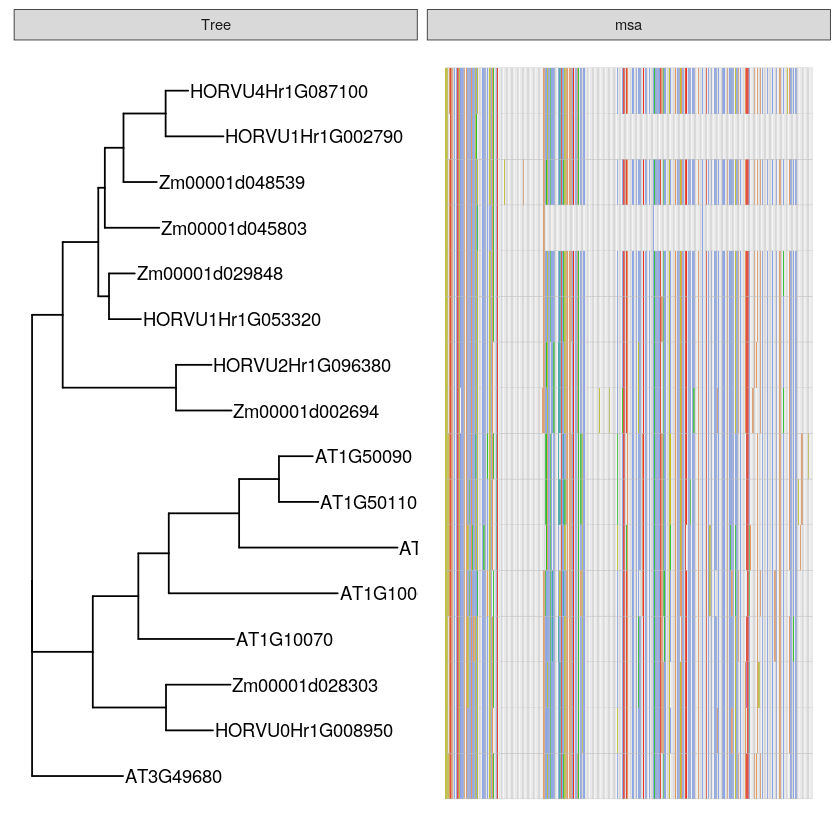

In [6]:
library(ggmsa)
#fasfile <- system.file("example_trees/proteinnames_N0.HOG0013194.afa", package="ggtree")
tree <- read.tree("~/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.tree")
#p <- ggtree(tree, size=1) + geom_tiplab()


#fasfile <- system.file("example_trees/proteinnames_N0.HOG0013194.afa", package = "ggmsa")
x <- readAAMultipleAlignment("/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.afa")
x
#d <- as.dist(stringDist(x, method = "hamming")/width(x)[1])

###data <- x
##d <- as.dist(stringDist(x, method = "hamming")/width(x)[1])
#library(ape)
#tree <- bionj(d)

#data <- x
data <- tidy_msa(x, start = 300, end = 598)

p <- ggtree(tree ) + geom_tiplab()

p + geom_facet(geom = geom_msa, data = data,  panel = 'msa',
               font = NULL, color = "Clustal") +
    xlim_tree(1)


#p2 <- p + 
#  geom_facet(geom = geom_msa, data = data,  
#            panel = 'Multiple Sequence Alignment',
#            color = "Chemistry_AA") + 
#  xlim_tree(3)

#pp <- facet_widths(p2, widths=c(.2, 1))


#msaplot(fasta)
#?msaplot

In [790]:
?geom_msa
#mma <- readAAMultipleAlignment("example_trees/proteinnames_N0.HOG0013194.afa")
#str(ma$Zm00001d048539)
#fasfile <- readDNAStringSet(ma)
#readAAStringSet(fasfile)
#?muscle
#muscle(stringset = "example_trees/proteinnames_N0.HOG0013194.afa")

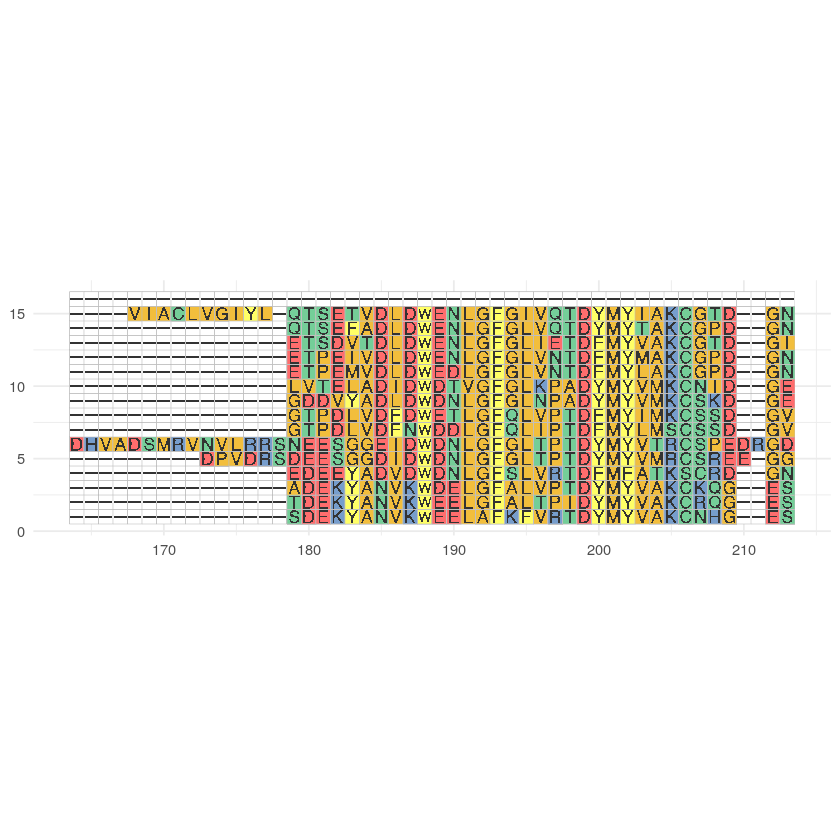

In [778]:
#protein_sequences <- system.file("extdata", "/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.afa", package = "ggmsa")
#protein_sequences <- readDNAStringSet("/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.afa")
#x <- readAAStringSet("/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.afa")
#x
#d <- as.dist(stringDist(x, method = "hamming")/width(x)[1])
protein_sequences <- readAAMultipleAlignment("/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.afa")
ggmsa(protein_sequences, 164, 213, color = "Chemistry_AA")

In [17]:
#working with the  fasta files
fasta_test <- read.fasta("example_trees/proteinnames_N0.HOG0013194.fa", as.string = TRUE, seqtype = "AA")
fasta_test$Zm00001d048539
#just the sequence
fasta_test$Zm00001d048539[1]
#?read.fasta
head(meta1)

[1] "MEPGLASRVARSAAQPLSGCLSRHSLSPWLKIQNHIYPMPSLCHKVPSTGKCHASMTTSYMETSDVTDLDWENLGFGLIETDFMYVAKCGTDGIFSKGEVLPFGPIALSPSAGVLNYGQGLFEGLKAYRKTDGSILLFRPEENAIRMLSGAERMCMPAPTVEQFVDAVKQTVLANKRWVPPTGKGSLYIRPLLIGSGAVLGLAPAPEYSFIIFVSPVGNYFKVRIAFPFTSNSTKIFCFNNAGIYVVCHFAFVHFILQEGLSPINLIVEDKFHRASPGGTGGVKTIGNYASVLKAQKIAKGKGYSDVLYLDAVHDKYLEEVSSCNIFVVKDNVISTPAIKGTILPGITRKSIIEVAQSKGFKVEERLVCVDELINADEVFCTGTAVVVSPVGSVTYMGKRVEYGNQGVGVVSQQLYKSLTSLQMGNVEDWMGWTMQLNQ"
attr(,"name")
[1] "Zm00001d048539"
attr(,"Annot")
[1] ">Zm00001d048539"
attr(,"class")
[1] "SeqFastaAA"

[1] "MEPGLASRVARSAAQPLSGCLSRHSLSPWLKIQNHIYPMPSLCHKVPSTGKCHASMTTSYMETSDVTDLDWENLGFGLIETDFMYVAKCGTDGIFSKGEVLPFGPIALSPSAGVLNYGQGLFEGLKAYRKTDGSILLFRPEENAIRMLSGAERMCMPAPTVEQFVDAVKQTVLANKRWVPPTGKGSLYIRPLLIGSGAVLGLAPAPEYSFIIFVSPVGNYFKVRIAFPFTSNSTKIFCFNNAGIYVVCHFAFVHFILQEGLSPINLIVEDKFHRASPGGTGGVKTIGNYASVLKAQKIAKGKGYSDVLYLDAVHDKYLEEVSSCNIFVVKDNVISTPAIKGTILPGITRKSIIEVAQSKGFKVEERLVCVDELINADEVFCTGTAVVVSPVGSVTYMGKRVEYGNQGVGVVSQQLYKSLTSLQMGNVEDWMGWTMQLNQ"

genes,HOG,logFC
<chr>,<chr>,<dbl>
AT1G50110,N0.HOG0013194,1.3
AT1G50090,N0.HOG0013194,-2.4
AT3G19710,N0.HOG0013194,2.0
AT3G49680,N0.HOG0013296,0.3
HORVU1Hr1G053320,N0.HOG0013296,3.2
Zm00001d029848,N0.HOG0013296,1.2


## Rec. Tree + log2FC + MSA

In [20]:
#this can solve my problems with using geom_hilight
#?nodeid
#nodeid(tree, tree$tip.label)
#nodeid(tree, tree$node.label[nchar(tree$node.label)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  genes = col_character(),
  HOG = col_character(),
  logFC = col_double()
)


Warning message:
“`filter_()` is deprecated as of dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


TableGrob (13 x 15) "layout": 24 grobs
    z         cells       name                                  grob
1   0 ( 1-13, 1-15) background       rect[plot.background..rect.178]
2   1 ( 8- 8, 5- 5)  panel-1-1               gTree[panel-1.gTree.32]
3   1 ( 8- 8, 7- 7)  panel-1-2               gTree[panel-2.gTree.43]
4   1 ( 8- 8, 9- 9)  panel-1-3               gTree[panel-3.gTree.54]
5   3 ( 6- 6, 5- 5)   axis-t-1                        zeroGrob[NULL]
6   3 ( 6- 6, 7- 7)   axis-t-2                        zeroGrob[NULL]
7   3 ( 6- 6, 9- 9)   axis-t-3                        zeroGrob[NULL]
8   3 ( 9- 9, 5- 5)   axis-b-1    absoluteGrob[GRID.absoluteGrob.60]
9   3 ( 9- 9, 7- 7)   axis-b-2    absoluteGrob[GRID.absoluteGrob.65]
10  3 ( 9- 9, 9- 9)   axis-b-3    absoluteGrob[GRID.absoluteGrob.70]
11  3 ( 8- 8, 4- 4)   axis-l-1    absoluteGrob[GRID.absoluteGrob.71]
12  3 ( 8- 8,10-10)   axis-r-1                        zeroGrob[NULL]
13  2 ( 7- 7, 5- 5)  strip-t-1                         gtable[st

[1] 1

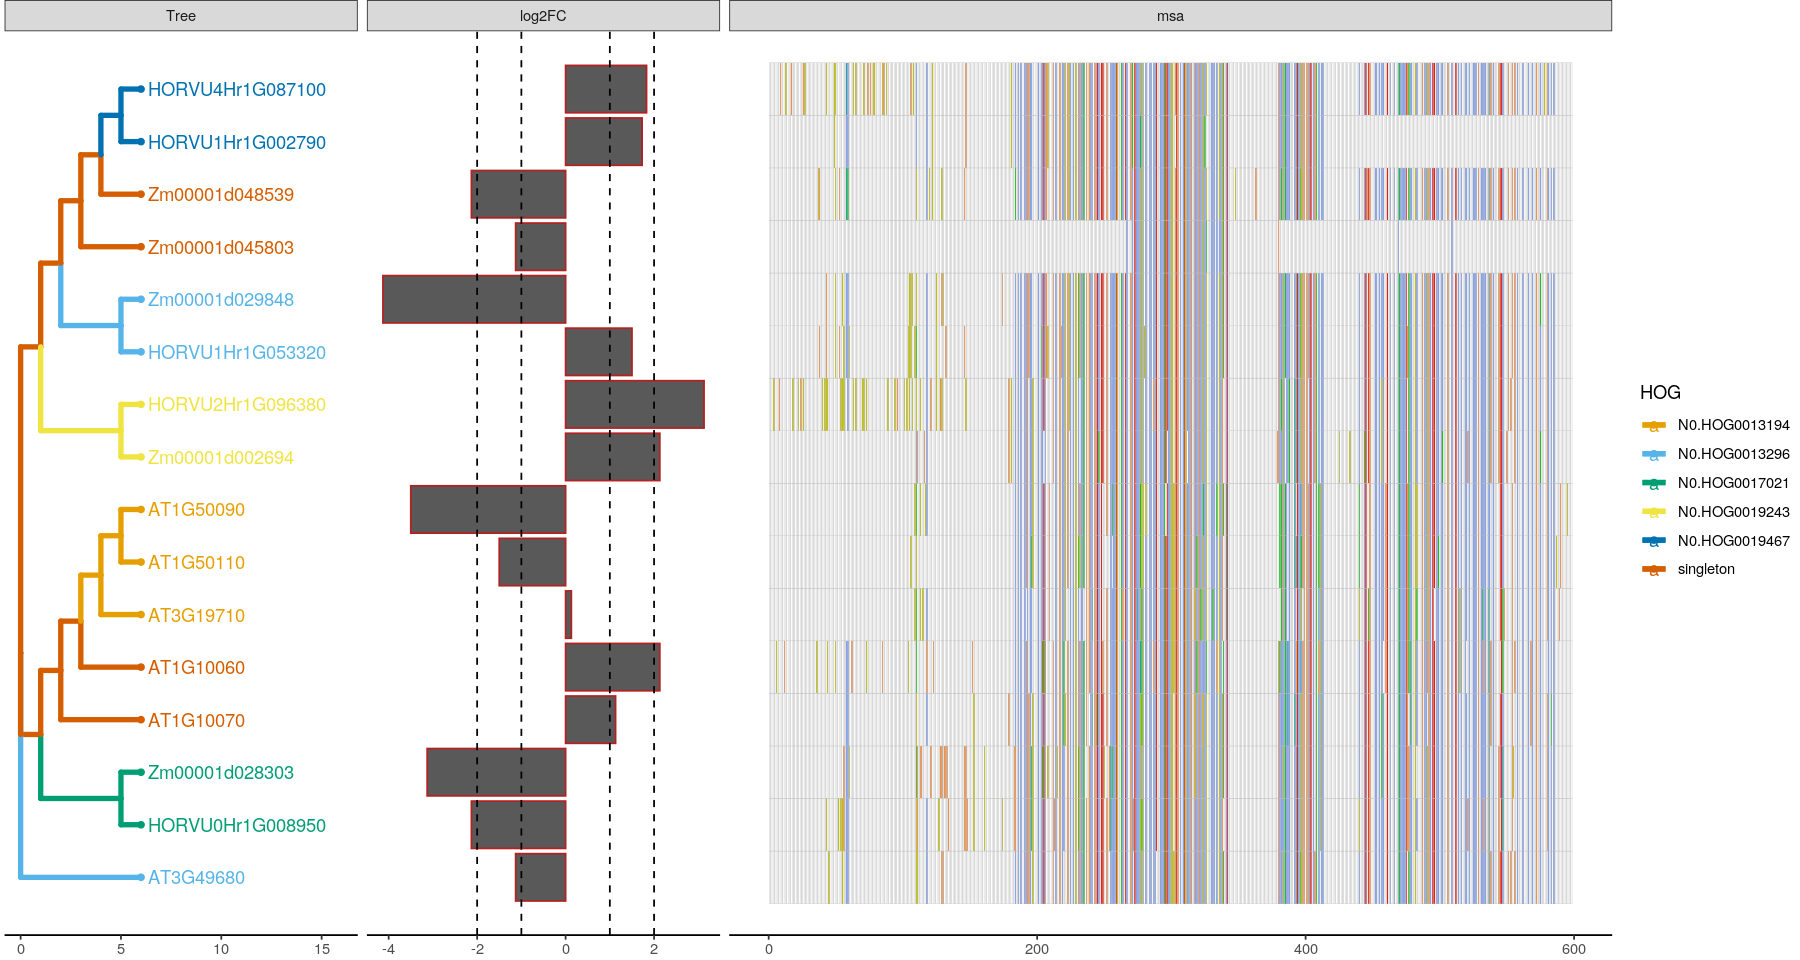

In [16]:
tree <- read.tree("~/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.tree")
meta1 <- read_table2("~/Desktop/PhD/A2TEA/shiny/example_trees/custom_metafile.txt")
#extracted from colourblind - removed black... how to deal with NAs..
cols <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")


# rlang package has the function is_empty()
# with it we can test for "character(0)"

el <- list()

for (i in 1:length(tree$tip.label)) {
    if (is_empty(meta1$HOG[meta1$genes == tree$tip.label[i]]) == FALSE) {
       first <- meta1$HOG[meta1$genes == tree$tip.label[i]]
       el <- c(el, list(filler = tree$tip.label[i]))
       names(el)[i] <- first
    }
    else {
       el <- c(el, list(singleton = tree$tip.label[i]))      
    }
}

#reduce the list to unique tags
el_split <- sapply(unique(names(el)), function(x) unname(unlist(el[names(el)==x])), simplify=FALSE)

p_OTU <- ggtree(tree, layout = 'rectangular', branch.length='none', size=1.5)

p <- groupOTU(p_OTU, el_split, 'HOG') + aes(color=HOG) +
                   geom_tippoint(aes(color=HOG)) +
            scale_color_manual(values=cols, na.translate=TRUE, na.value = "black") +
            geom_tiplab(aes(color=HOG), align=F, offset = 0.3, alpha=1)
                                   

#p <- ggtree(tree, layout='rectangular', branch.length="none", aes(color=HOG)) %<+% meta1 +

#p %<+% meta1 + aes(color=HOG) #+
#  geom_tippoint(aes(color=HOG)) +
#  scale_color_manual(values=cols, na.translate=TRUE, na.value = "black") #+
#  geom_tiplab(aes(color=HOG), align=F, offset = 0.1, alpha=1)


d <- data.frame(id = rep(tree$tip.label),
                    value = abs(rnorm(16)))

d$value[1] <- -1.12942
d$value[2] <- -2.12942
d$value[3] <- -3.12942
d$value[4] <- 1.12942
d$value[5] <- 2.12942
d$value[6] <- 0.12942
d$value[7] <- -1.5
d$value[8] <- -3.5
d$value[9] <- 1.5
d$value[10] <- -4.12942
d$value[11] <- -1.12942
d$value[12] <- -2.12942
d$value[13] <- 1.72942
d$value[14] <- 1.82942
d$value[15] <- 2.12942
d$value[16] <- 3.12942


lines=data.frame(y = c(-2,-1,1,2), .panel='log2FC')

                   
#xlim set x axis limits for only Tree panel
#xlim tree calculated as number of tips tips?
p2 <- facet_plot(p + xlim_tree(16), panel = 'log2FC', data = d, 
                geom = geom_barh, 
                mapping = aes(x = value),
                stat='identity',
#                inherit.aes = TRUE,
                color='firebrick') + theme_tree2(plot.margin=margin(0, 0, 0, 0)) + geom_vline(data=lines, aes(xintercept=y), linetype = "dashed")
                   
                   

                   
    
x <- readAAMultipleAlignment("/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/proteinnames_N0.HOG0013194.afa")

data <- tidy_msa(x, start = 1, end = 598)

#p <- ggtree(tree ) + geom_tiplab()

#use font to display amino acid code, eg "helvetical"
p3 <- p2 + geom_facet(geom = geom_msa, data = data,  panel = 'msa',
               font = NULL, color = "Clustal")
                   
          
gt = ggplot_gtable(ggplot_build(p3))
gtable_show_layout(gt)
gt

gt$layout$l[grep('background', gt$layout$name)]
#gt$widths[1] = 20*gt$widths[1] # in this case it was colmun 5 - double the width
gt$widths[5] = 2*gt$widths[5] # in this case it was colmun 5 - double the width
gt$widths[7] = 2*gt$widths[7] # in this case it was colmun 7 - double the width
gt$widths[9] = 5*gt$widths[9] # in this case it was colmun 9 - double the width

#this option is nice for jupyter but I have to see what will be possible in shiny                   
options(repr.plot.width=15, repr.plot.height=8)

grid.draw(gt) # plot with grid draw

### now implementation tests via first actual A2TEA pipeline output

In [6]:
#using saveRDS and readRDS

# load the A2TEA objects
#A2TEA_fullList <- readRDS("/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/A2TEA_finished.rds")


#choose hypothesis
#hypothesis <- A2TEA_fullList[[1]]
#HYPOTHESES.a2tea <- A2TEA_fullList[[2]]
#HOG_DE.a2tea <- A2TEA_fullList[[3]]


## define my two classes - defining the A2TEA HYPOTHESES object ;D
# class for the expanded_OG - containing all different types of data we have on it
#setClass("expanded_OG", slots=list(genes="spec_tbl_df", 
                                  fasta_files="list", 
                                  msa="AAMultipleAlignment", 
                                  tree="phylo"))

# class for the hypotheses
#setClass("hypothesis", slots=list(description="character", 
                                  number="character",
                                  expanded_in ="character", 
                                  compared_to="character", 
                                  expanded_OGs="list"))

#HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000005@



#HOG_DE.a2tea$
#HYPOTHESES.a2tea <- HYPOTHESES.a2tea

#simple coloured
#summary(HYPOTHESES.a2tea)

Warning message:
“Removed 5 rows containing missing values (position_stack).”


TableGrob (13 x 15) "layout": 24 grobs
    z         cells       name                                   grob
1   0 ( 1-13, 1-15) background       rect[plot.background..rect.3982]
2   1 ( 8- 8, 5- 5)  panel-1-1              gTree[panel-1.gTree.3788]
3   1 ( 8- 8, 7- 7)  panel-1-2              gTree[panel-2.gTree.3799]
4   1 ( 8- 8, 9- 9)  panel-1-3              gTree[panel-3.gTree.3810]
5   3 ( 6- 6, 5- 5)   axis-t-1                         zeroGrob[NULL]
6   3 ( 6- 6, 7- 7)   axis-t-2                         zeroGrob[NULL]
7   3 ( 6- 6, 9- 9)   axis-t-3                         zeroGrob[NULL]
8   3 ( 9- 9, 5- 5)   axis-b-1   absoluteGrob[GRID.absoluteGrob.3815]
9   3 ( 9- 9, 7- 7)   axis-b-2   absoluteGrob[GRID.absoluteGrob.3820]
10  3 ( 9- 9, 9- 9)   axis-b-3   absoluteGrob[GRID.absoluteGrob.3825]
11  3 ( 8- 8, 4- 4)   axis-l-1   absoluteGrob[GRID.absoluteGrob.3826]
12  3 ( 8- 8,10-10)   axis-r-1                         zeroGrob[NULL]
13  2 ( 7- 7, 5- 5)  strip-t-1                     

[1] 1

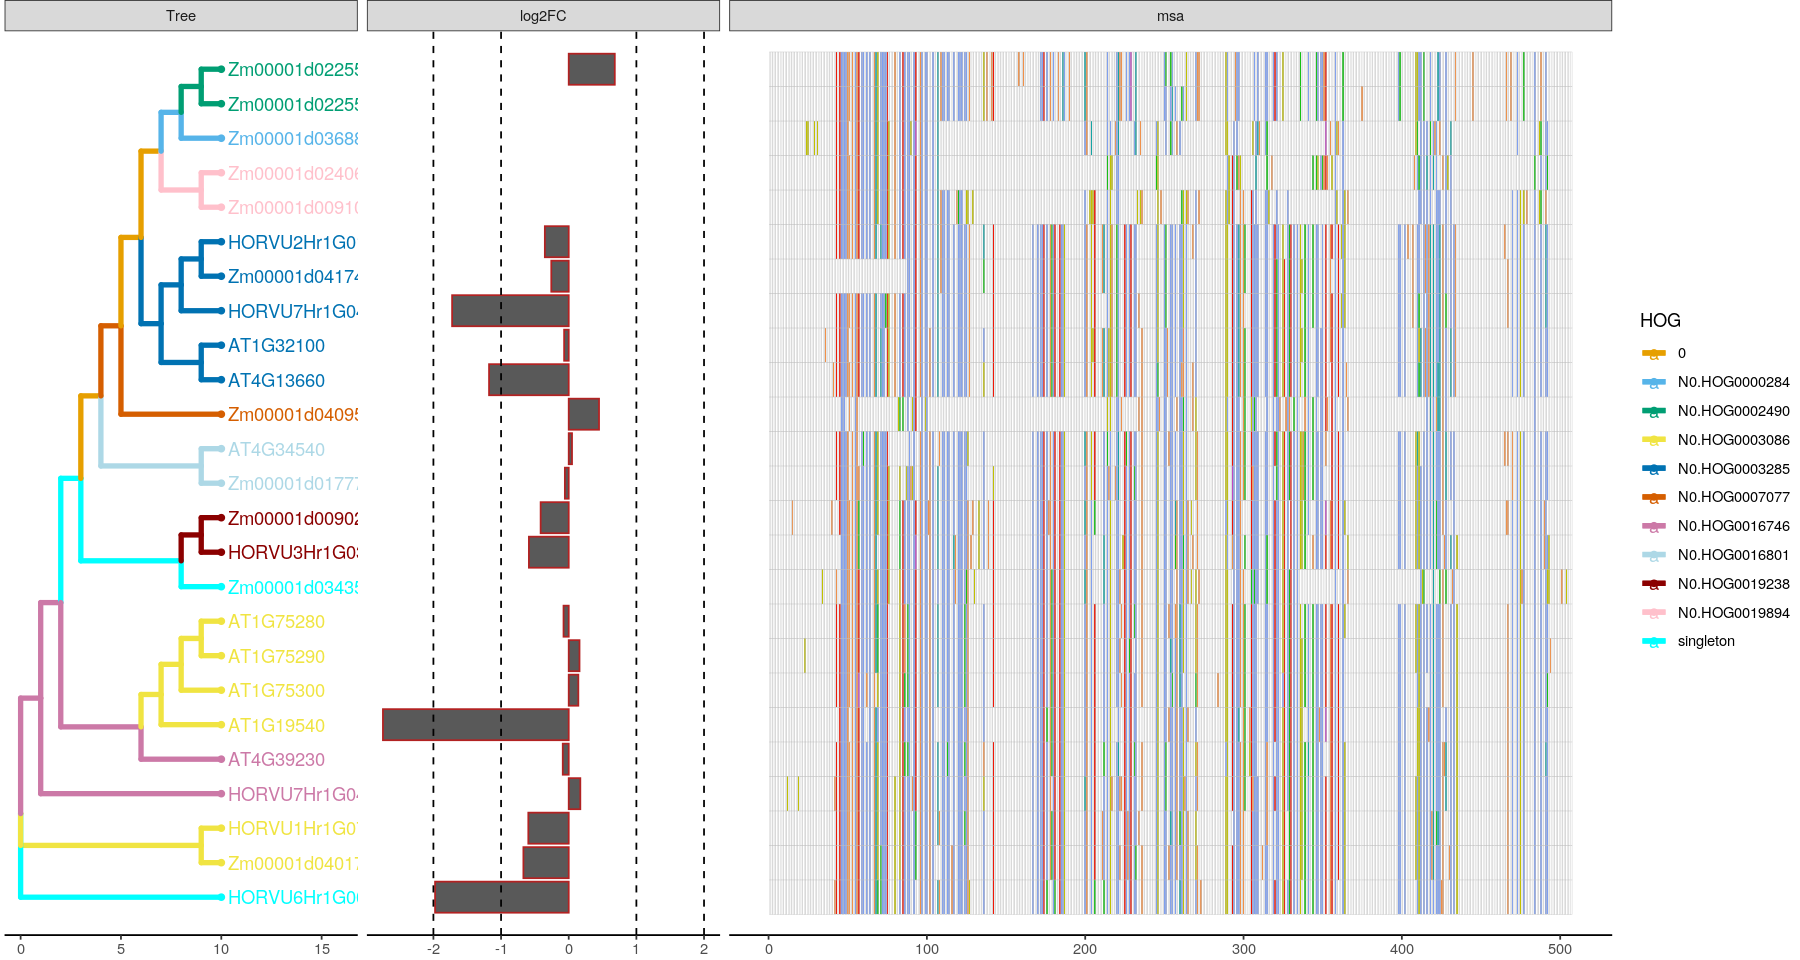

In [63]:
#using save() and load()
#works and is less code since I don't have to assign sublists

#in any cases it is important to either also import or to create the classes
#since it's only two and nothing too complex I think it actually helps understanding to have them again here

## define my two classes - defining the A2TEA HYPOTHESES object ;D
# class for the expanded_OG - containing all different types of data we have on it
setClass("expanded_OG", slots=list(genes="spec_tbl_df", 
                                  fasta_files="list", 
                                  msa="AAMultipleAlignment", 
                                  tree="phylo"))

# class for the hypotheses
setClass("hypothesis", slots=list(description="character", 
                                  number="character",
                                  expanded_in ="character", 
                                  compared_to="character", 
                                  expanded_OGs="list"))


#load("/home/tyll/Desktop/PhD/A2TEA/shiny/example_trees/A2TEA_finished.RData")


# choice - have to see how to do it in shiny
# but in any case I can assign the name of HOG, etc. to a variable and
# call it conveniently as part of a $ operator string inside "[[]]"


# choose hypothesis
#hypotheses

#choose OG to look at
OG_name <- "N0.HOG0003086"


#tree <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000431@tree
tree <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs[[OG_name]]@tree
info <- HOG_DE.a2tea


#extracted from colourblind - removed black... how to deal with NAs..
cols <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "lightblue", "darkred", "pink", "cyan")


# rlang package has the function is_empty()
# with it we can test for "character(0)"

el <- list()

for (i in 1:length(tree$tip.label)) {
    if (is_empty(info$HOG[info$gene == tree$tip.label[i]]) == FALSE) {
       first <- info$HOG[info$gene == tree$tip.label[i]]
       el <- c(el, list(filler = tree$tip.label[i]))
       names(el)[i] <- first
    }
    else {
       el <- c(el, list(singleton = tree$tip.label[i]))      
    }
}



#reduce the list to unique tags
el_split <- sapply(unique(names(el)), function(x) unname(unlist(el[names(el)==x])), simplify=FALSE)

p_OTU <- ggtree(tree, layout = 'rectangular', branch.length='none', size=1.5)

p <- groupOTU(p_OTU, el_split, 'HOG') + aes(color=HOG) +
                   geom_tippoint(aes(color=HOG)) +
            scale_color_manual(values=cols, na.translate=TRUE, na.value = "black") +
            geom_tiplab(aes(color=HOG), align=F, offset = 0.3, alpha=1)
                                   

#this is such a convenient way to do this ;D + we also drop the columns we don't need
d <- filter(HOG_DE.a2tea, gene %in% tree$tip.label) %>% select (-c(species, baseMean, HOG, lfcSE, stat, pvalue, padj))


                   
lines=data.frame(y = c(-2,-1,1,2), .panel='log2FC')

                   
#xlim set x axis limits for only Tree panel
#xlim tree calculated as number of tips tips?
p2 <- facet_plot(p + xlim_tree(16), panel = 'log2FC', data = d, 
                geom = geom_barh, 
                mapping = aes(x = log2FoldChange),
                stat='identity',
#                inherit.aes = TRUE,
                color='firebrick') + theme_tree2(plot.margin=margin(0, 0, 0, 0)) + geom_vline(data=lines, aes(xintercept=y), linetype = "dashed")
                   
                   
#get the msa and assign it to x (for now...)
#x <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs$N0.HOG0000431@msa
x <- HYPOTHESES.a2tea$hypothesis_1@expanded_OGs[[OG_name]]@msa

data <- tidy_msa(x, start = 1, end = 598)


#use font to display amino acid code, eg "helvetical"
p3 <- p2 + geom_facet(geom = geom_msa, data = data,  panel = 'msa',
               font = NULL, color = "Clustal")
                   
          
gt = ggplot_gtable(ggplot_build(p3))
gtable_show_layout(gt)
gt

gt$layout$l[grep('background', gt$layout$name)]
#gt$widths[1] = 20*gt$widths[1] # in this case it was colmun 5 - double the width
gt$widths[5] = 2*gt$widths[5] # in this case it was colmun 5 - double the width
gt$widths[7] = 2*gt$widths[7] # in this case it was colmun 7 - double the width
gt$widths[9] = 5*gt$widths[9] # in this case it was colmun 9 - double the width

#this option is nice for jupyter but I have to see what will be possible in shiny                   
options(repr.plot.width=15, repr.plot.height=8)

grid.draw(gt) # plot with grid draw

In [46]:
#HOG_DE.a2tea$log2FoldChange[HOG_DE.a2tea$gene == tree$tip.label]
#tree$tip.label

filter(HOG_DE.a2tea, gene %in% tree$tip.label) %>% select (-c(species, baseMean, HOG, lfcSE, stat, pvalue, padj))

gene,log2FoldChange
<chr>,<dbl>
AT1G69150,NA
AT2G43220,NA
AT3G06990,-0.325632286
AT3G07000,-2.356260234
AT3G27473,0.004823719
AT3G27480,NA
AT3G27500,NA
AT3G28650,-0.614423135
AT3G45530,-1.435429608
